In [ ]:
pip install python-terrier


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 21.7 MB/s 
     |████████████████████████████████| 69 kB 4.1 MB/s 
     |████████████████████████████████| 303 kB 42.5 MB/s 
     |████████████████████████████████| 46 kB 3.0 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2 MB 40.1 MB/s 
     |████████████████████████████████| 126 kB 48.1 MB/s 
     |████████████████████████████████| 294 kB 47.3 MB/s 
     |████████████████████████████████| 72 kB 1.6 MB/s 
     |████████████████████████████████| 285 kB 56.7 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.8.1-py3-none-any.whl size=104091 sha256=0b30e41c5a4b7804de33d48783ec7f91c79c9c00b16e8

In [ ]:
import pyterrier as pt
pt.init()


terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.8.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
doc_master = np.load('/content/drive/MyDrive/IRDM/queries_doc_description.npy',allow_pickle='TRUE').item()

load_query = np.load('/content/drive/MyDrive/IRDM/queries_doc_description.npy',allow_pickle='TRUE').item()

query_master= np.load('/content/drive/MyDrive/IRDM/master_set_train.npy',allow_pickle='TRUE').item()

In [ ]:
doc_master["1"]

[['Coronavirus', 0.4199124254962244, 0.07581720479813099],
 ['Transmission medicine', 0.03210100695163328, 0.04319495318024565],
 ['Gujarat', 0.08630455634472439, 0.004855768384637423],
 ['Hadith', 0.06587696724257161, 0.003952971132427847],
 ['Intentionality', 0.05857526768022035, 0.0008347270626528073],
 ['COVID19 pandemic in the United States',
  0.1664553674867992,
  0.01707722578061533],
 ['COVID19 pandemic in the San Francisco Bay Area',
  0.1164857837991916,
  0.005391853136856172],
 ['Transmission medicine', 0.07058609890382758, 0.01917606242135641],
 ['Novel', 0.1561994921419309, 0.007434836943100382],
 ['Severe acute respiratory syndrome coronavirus 2',
  0.2324524887827977,
  0.02700931433206239],
 ['Novel virus', 0.1136226456801944, 0.01108930552046698],
 ['Novel coronavirus', 0.3496795093890511, 0.0472443806720996],
 ['COVID19', 0.1827950108643849, 0.02738352858073638],
 ['Wuhan', 0.4318614498180889, 0.07244957115748357],
 ['End of World War II in Europe', 0.10966374203521

In [ ]:
def convert_into_top_segments(file_with_dict,number,target=1):
  #targer 1 denotes Cosine and 2 denotes PR 
  new_dict={}
  for keys in file_with_dict.keys():
    new_dict.update({keys:sorted(file_with_dict[keys], key = lambda x: x[target],reverse=True)[:number]})
  return new_dict

In [ ]:
#For Cosine dictionary 
top_one_concept=convert_into_top_segments(query_master,1,1)
top_two_concept=convert_into_top_segments(query_master,2,1)
top_three_concept=convert_into_top_segments(query_master,3,1)
top_five_concept=convert_into_top_segments(query_master,5,1)
top_ten_concept=convert_into_top_segments(query_master,10,1)
top_twenty_concept=convert_into_top_segments(query_master,20,1)



In [ ]:
#For Page Rank dictionary 
top_one_concept_pr=convert_into_top_segments(query_master,1,2)
top_two_concept_pr=convert_into_top_segments(query_master,2,2)
top_three_concept_pr=convert_into_top_segments(query_master,3,2)
top_five_concept_pr=convert_into_top_segments(query_master,5,2)
top_ten_concept_pr=convert_into_top_segments(query_master,10,2)
top_twenty_concept_pr=convert_into_top_segments(query_master,20,2)

In [ ]:
# Makes file Experiment Ready
def make_experiment_file(dict_input):
  output_file={}
  for keys in dict_input.keys():
    for k in range(len(dict_input[keys])):
      if keys not in output_file.keys():
        output_file.update({keys:[dict_input[keys][k][0]]})
      else:
        output_file[keys].append(dict_input[keys][k][0])
  return output_file

In [ ]:
# You can convert doc dictionaries into experiment files, here Cosine Files are being generated  
cosine_one=make_experiment_file(top_one_concept)
cosine_two=make_experiment_file(top_two_concept)
cosine_three=make_experiment_file(top_three_concept)
cosine_five=make_experiment_file(top_five_concept)
cosine_ten=make_experiment_file(top_ten_concept)
cosine_twenty=make_experiment_file(top_twenty_concept)


In [ ]:
# For the master file 
master_doc_file=make_experiment_file(query_master)

In [ ]:
# Experiment Files for Page-rank, this is to check at rank cut-offs 
pr_one=make_experiment_file(top_one_concept_pr)
pr_two=make_experiment_file(top_two_concept_pr)
pr_three=make_experiment_file(top_three_concept_pr)
pr_five=make_experiment_file(top_five_concept_pr)
pr_ten=make_experiment_file(top_ten_concept_pr)
pr_twenty=make_experiment_file(top_twenty_concept_pr)

In [ ]:
#To calculate jaccard Similarity as a driver function
def calculate_similarity(query_file,doc_file):
  calc_score={}
  for keys in query_file.keys():
    for docs in doc_file.keys():
      if keys not in calc_score.keys():
        calc_score.update({keys:[[docs,jaccard_similarity_score(query_file[keys],doc_file[docs])]]})
      else:
        calc_score[keys].append([docs,jaccard_similarity_score(query_file[keys],doc_file[docs])])
  return calc_score

In [ ]:
# Query File 
query_master_file=make_experiment_file(load_query)

In [ ]:
# Jaccard Similarity Function
def jaccard_similarity_score(document_1,document_2): 
    document_1=set(document_1)
    document_2=set(document_2)
    inter=document_1.intersection(document_2)
    union = document_1.union(document_2)
    return float(len(inter)) / len(union)

In [ ]:
# Calculates Jaccard Similarity Overall for Cos Files
cos_score_one = calculate_similarity(query_master_file,cosine_one)
cos_score_two = calculate_similarity(query_master_file,cosine_two)
cos_score_three = calculate_similarity(query_master_file,cosine_three)
cos_score_five  = calculate_similarity(query_master_file,cosine_five)
cos_score_ten = calculate_similarity(query_master_file,cosine_ten)
cos_score_twenty = calculate_similarity(query_master_file,cosine_twenty)


In [ ]:
# Calculates Jaccard Similarity Overall for Pr Files

pr_score_one = calculate_similarity(query_master_file,pr_one)
pr_score_two = calculate_similarity(query_master_file,pr_two)
pr_score_three = calculate_similarity(query_master_file,pr_three)
pr_score_five  = calculate_similarity(query_master_file,pr_five)
pr_score_ten = calculate_similarity(query_master_file,pr_ten)
pr_score_twenty = calculate_similarity(query_master_file,pr_twenty)

In [ ]:
# Score with no cut off
total_score=calculate_similarity(query_master_file,master_doc_file)

In [ ]:
# Can create a mapper to see if the files are there 
qrels_path=("/content/drive/MyDrive/IRDM/podcasts_2020_train.1-8.qrels")
qrels = pt.io.read_qrels(qrels_path)
qrels["qid"]=qrels["qid"].astype(int)
qrels["qid"]=qrels["qid"]-1
qrels["qid"]=qrels["qid"].astype("str")
qrels['rel_files']=list(qrels["docno"].apply(lambda x: x.split(":")[-1].split('.')[0]))

In [ ]:
query_mapper={}
for i in range(len(list(np.unique(qrels["qid"])))):
  query_mapper.update({str(i+1):list(qrels[qrels["qid"]==str(i)]["rel_files"])})

In [ ]:
# Returns relevant documents 
def return_relevant(mapping_file,score_file):
  just_rel={}
  for keys in score_file.keys():
    for i in range(len(score_file[keys])):
        if score_file[keys][i][0] in mapping_file[keys]:
          if keys not in just_rel.keys():
            just_rel.update({keys:[score_file[keys][i]]})
          else:
            just_rel[keys].append(score_file[keys][i])
  return just_rel

In [ ]:
# Maps relevant files to topics for cosine
cos_one_rel=return_relevant(query_mapper,cos_score_one)
cos_two_rel=return_relevant(query_mapper,cos_score_two)
cos_three_rel=return_relevant(query_mapper,cos_score_three)
cos_five_rel=return_relevant(query_mapper,cos_score_five)
cos_ten_rel=return_relevant(query_mapper,cos_score_ten)
cos_twenty_rel=return_relevant(query_mapper,cos_score_twenty)

In [ ]:
# Maps relevant files to topics for pr

pr_one_rel=return_relevant(query_mapper,pr_score_one)
pr_two_rel=return_relevant(query_mapper,pr_score_two)
pr_three_rel=return_relevant(query_mapper,pr_score_three)
pr_five_rel=return_relevant(query_mapper,pr_score_five)
pr_ten_rel=return_relevant(query_mapper,pr_score_ten)
pr_twenty_rel=return_relevant(query_mapper,pr_score_twenty)

In [ ]:
# Maps relevant files to topics for the entire set 
total_rel = return_relevant(query_mapper,total_score)

In [ ]:
#Generates X for Plotting and tables 

def get_x(input_file):
  send_x={}
  for keys in input_file.keys():
    for i in range(len(input_file[keys])):
      if keys not in send_x.keys():
        send_x.update({keys:[input_file[keys][i][1]]})
      else:
        send_x[keys].append(input_file[keys][i][1])
  return send_x

In [ ]:
#Generates X for Plotting and tables 

X_cos_one=get_x(cos_one_rel)
X_cos_two=get_x(cos_two_rel)
X_cos_three=get_x(cos_three_rel)
X_cos_five=get_x(cos_five_rel)
X_cos_ten=get_x(cos_ten_rel)
X_cos_twenty=get_x(cos_twenty_rel)

In [ ]:
#Generates X for Plotting and tables 

X_pr_one=get_x(pr_one_rel)
X_pr_two=get_x(pr_two_rel)
X_pr_three=get_x(pr_three_rel)
X_pr_five=get_x(pr_five_rel)
X_pr_ten=get_x(pr_ten_rel)
X_pr_twenty=get_x(pr_twenty_rel)

In [ ]:
#Generates X for Plotting and tables 

X_rel=get_x(total_rel)

In [ ]:
#Maps non-relevant Files with a rank cut-off remove [:70] to a number of your choice for a custom cut-off 
def get_non_relevant(mapper,doc):
  non_rel={}
  for keys in doc.keys():
    for i in range(len(doc[keys])):
        if doc[keys][i][0] not in mapper[keys]:
          if keys not in non_rel.keys():
            non_rel.update({keys:[doc[keys][i]]})
          else:
            non_rel[keys].append(doc[keys][i])

  
  for k in non_rel.keys():
    non_rel[k]= sorted(non_rel[k],key= lambda x: x[1], reverse=True)[:70]

  return non_rel

In [ ]:
#Maps non-relevant Files with a rank cut-off remove [:70] to a number of your choice for no cut-off 

def get_non_relevant_no_rank(mapper,doc):
  non_rel={}
  for keys in doc.keys():
    for i in range(len(doc[keys])):
        if doc[keys][i][0] not in mapper[keys]:
          if keys not in non_rel.keys():
            non_rel.update({keys:[doc[keys][i]]})
          else:
            non_rel[keys].append(doc[keys][i])
  return non_rel

In [ ]:
# Mapping non relevant files
total_non_rel=get_non_relevant_no_rank(query_mapper,total_score)
X_non_rel=get_x(total_non_rel)

In [ ]:
# Mapping non relevant files

cos_one_non_rel=get_non_relevant(query_mapper,cos_score_one)
cos_two_non_rel=get_non_relevant(query_mapper,cos_score_two)
cos_three_non_rel=get_non_relevant(query_mapper,cos_score_three)
cos_five_non_rel=get_non_relevant(query_mapper,cos_score_five)
cos_ten_non_rel=get_non_relevant(query_mapper,cos_score_ten)
cos_twenty_non_rel=get_non_relevant(query_mapper,cos_score_twenty)

In [ ]:
# Mapping non relevant files

cos_one_non_rel_nr=get_non_relevant_no_rank(query_mapper,cos_score_one)
cos_two_non_rel_nr=get_non_relevant_no_rank(query_mapper,cos_score_two)
cos_three_non_rel_nr=get_non_relevant_no_rank(query_mapper,cos_score_three)
cos_five_non_rel_nr=get_non_relevant_no_rank(query_mapper,cos_score_five)
cos_ten_non_rel_nr=get_non_relevant_no_rank(query_mapper,cos_score_ten)
cos_twenty_non_rel_nr=get_non_relevant_no_rank(query_mapper,cos_score_twenty)

In [ ]:
# Mapping non relevant files
pr_one_non_rel_nr=get_non_relevant_no_rank(query_mapper,pr_score_one)
pr_two_non_rel_nr=get_non_relevant_no_rank(query_mapper,pr_score_two)
pr_three_non_rel_nr=get_non_relevant_no_rank(query_mapper,pr_score_three)
pr_five_non_rel_nr=get_non_relevant_no_rank(query_mapper,pr_score_five)
pr_ten_non_rel_nr=get_non_relevant_no_rank(query_mapper,pr_score_ten)
pr_twenty_non_rel_nr=get_non_relevant_no_rank(query_mapper,pr_score_twenty)

In [ ]:
# Mapping non relevant files

pr_one_non_rel=get_non_relevant(query_mapper,pr_score_one)
pr_two_non_rel=get_non_relevant(query_mapper,pr_score_two)
pr_three_non_rel=get_non_relevant(query_mapper,pr_score_three)
pr_five_non_rel=get_non_relevant(query_mapper,pr_score_five)
pr_ten_non_rel=get_non_relevant(query_mapper,pr_score_ten)
pr_twenty_non_rel=get_non_relevant(query_mapper,pr_score_twenty)

In [ ]:
# Mapping non relevant files

X_cos_nrel_one=get_x(cos_one_non_rel)
X_cos_nrel_two=get_x(cos_two_non_rel)
X_cos_nrel_three=get_x(cos_three_non_rel)
X_cos_nrel_five=get_x(cos_five_non_rel)
X_cos_nrel_ten=get_x(cos_ten_non_rel)
X_cos_nrel_twenty=get_x(cos_twenty_non_rel)

X_cos_nrel_one_nr=get_x(cos_one_non_rel_nr)
X_cos_nrel_two_nr=get_x(cos_two_non_rel_nr)
X_cos_nrel_three_nr=get_x(cos_three_non_rel_nr)
X_cos_nrel_five_nr=get_x(cos_five_non_rel_nr)
X_cos_nrel_ten_nr=get_x(cos_ten_non_rel_nr)
X_cos_nrel_twenty_nr=get_x(cos_twenty_non_rel_nr)

In [ ]:
# Mapping non relevant files

X_pr_nrel_one=get_x(pr_one_non_rel)
X_pr_nrel_two=get_x(pr_two_non_rel)
X_pr_nrel_three=get_x(pr_three_non_rel)
X_pr_nrel_five=get_x(pr_five_non_rel)
X_pr_nrel_ten=get_x(pr_ten_non_rel)
X_pr_nrel_twenty=get_x(pr_twenty_non_rel)


X_pr_nrel_one_nr=get_x(pr_one_non_rel_nr)
X_pr_nrel_two_nr=get_x(pr_two_non_rel_nr)
X_pr_nrel_three_nr=get_x(pr_three_non_rel_nr)
X_pr_nrel_five_nr=get_x(pr_five_non_rel_nr)
X_pr_nrel_ten_nr=get_x(pr_ten_non_rel_nr)
X_pr_nrel_twenty_nr=get_x(pr_twenty_non_rel_nr)

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Saving files for Plotting per topic and sensitivity 

In [ ]:
top_num=list(range(1,9))
for t in top_num:
  muster = {'top_one':X_cos_one[str(t)],'top_two' :X_cos_two[str(t)],'top_three': X_cos_three[str(t)],'top_five': X_cos_five[str(t)], 'top_ten': X_cos_ten[str(t)], 'top_twenty': X_cos_twenty[str(t)]}
  save_fil=pd.DataFrame.from_dict(muster)
  save_fil.to_csv('/content/drive/MyDrive/IRDM/Cosine_relevant_{}.csv'.format(str(t)),index=False)

In [ ]:
top_num=list(range(1,9))
for t in top_num:
  muster = {'top_one':X_pr_one[str(t)],'top_two' :X_pr_two[str(t)],'top_three': X_pr_three[str(t)],'top_five': X_pr_five[str(t)], 'top_ten': X_pr_ten[str(t)], 'top_twenty': X_pr_twenty[str(t)]}
  save_fil=pd.DataFrame.from_dict(muster)
  save_fil.to_csv('/content/drive/MyDrive/IRDM/pagerank_relevant_{}.csv'.format(str(t)),index=False)

In [ ]:
top_num=list(range(1,9))
for t in top_num:
  muster = {'top_one':X_cos_nrel_one_nr[str(t)],'top_two' :X_cos_nrel_two_nr[str(t)],'top_three': X_cos_nrel_three_nr[str(t)],'top_five': X_cos_nrel_five_nr[str(t)], 'top_ten': X_cos_nrel_ten_nr[str(t)], 'top_twenty': X_cos_nrel_twenty_nr[str(t)]}
  save_fil=pd.DataFrame.from_dict(muster)
  save_fil.to_csv('/content/drive/MyDrive/IRDM/Cosine_non_relevant_nr{}.csv'.format(str(t)),index=False)

In [ ]:
top_num=list(range(1,9))
for t in top_num:
  muster = {'top_one':X_pr_nrel_one_nr[str(t)],'top_two' :X_pr_nrel_two_nr[str(t)],'top_three': X_pr_nrel_three_nr[str(t)],'top_five': X_pr_nrel_five_nr[str(t)], 'top_ten': X_pr_nrel_ten_nr[str(t)], 'top_twenty': X_pr_nrel_twenty_nr[str(t)]}
  save_fil=pd.DataFrame.from_dict(muster)
  save_fil.to_csv('/content/drive/MyDrive/IRDM/pagerank_non_relevant_nr{}.csv'.format(str(t)),index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IRDM/Cosine_relevant_6.csv')

In [ ]:
!pip install num2word

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install inflect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import inflect
p = inflect.engine()
p.number_to_words(99)


'ninety-nine'

Generating different Plots 

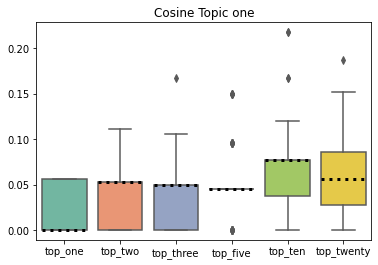

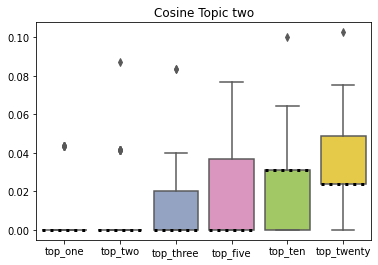

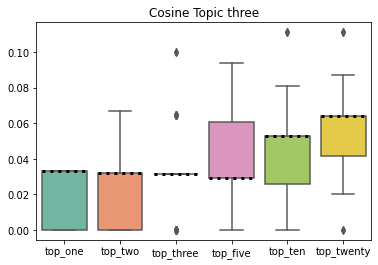

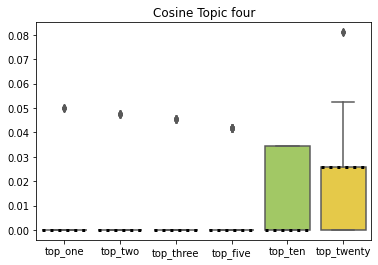

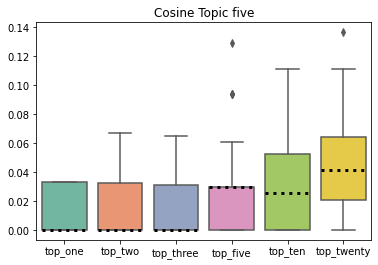

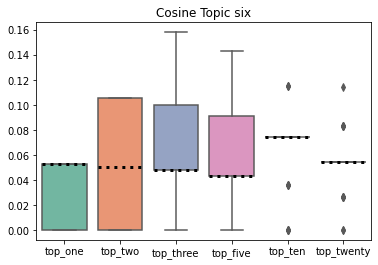

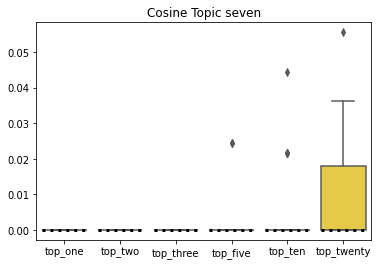

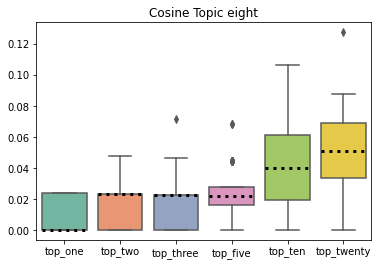

In [ ]:
import num2word
for i in range(1,9):
  df=pd.read_csv('/content/drive/MyDrive/IRDM/Cosine_relevant_{}.csv'.format(str(i)))
  fig, ax = plt.subplots()
  ax = sns.boxplot(data=df, orient="v", palette="Set2",medianprops={'color': 'black', 'ls': ':', 'lw': 3})  
  plt.title('Cosine Topic {}'.format(p.number_to_words(i)))
  plt.savefig('/content/drive/MyDrive/IRDM/cosine_topic_{}.png'.format(i))

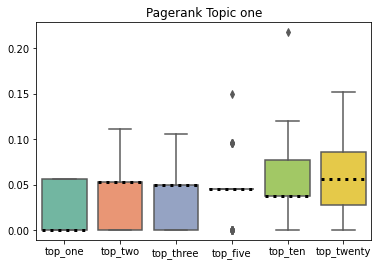

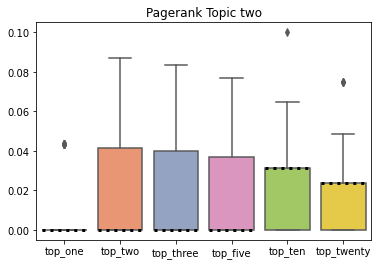

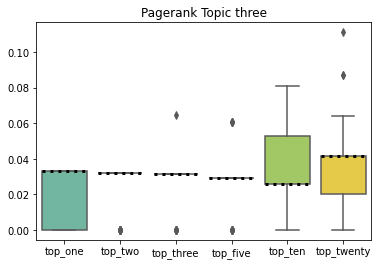

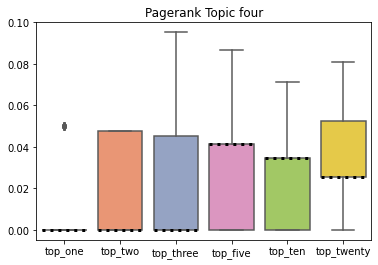

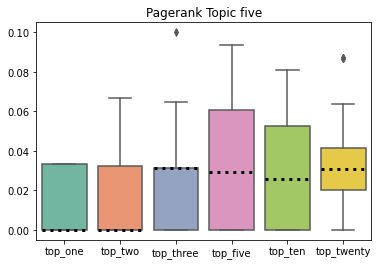

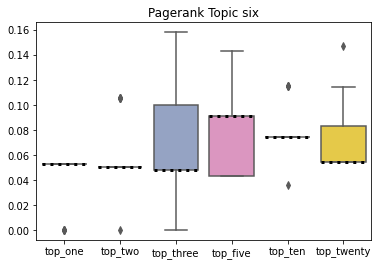

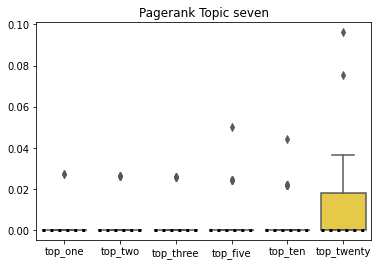

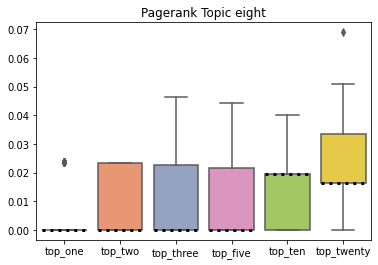

In [ ]:
for i in range(1,9):
  df=pd.read_csv('/content/drive/MyDrive/IRDM/pagerank_relevant_{}.csv'.format(str(i)))
  fig, ax = plt.subplots()
  ax = sns.boxplot(data=df, orient="v", palette="Set2",medianprops={'color': 'black', 'ls': ':', 'lw': 3})  
  plt.title('Pagerank Topic {}'.format(p.number_to_words(i)))
  plt.savefig('/content/drive/MyDrive/IRDM/pagerank_topic_{}.png'.format(i))

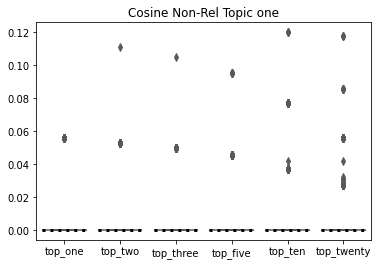

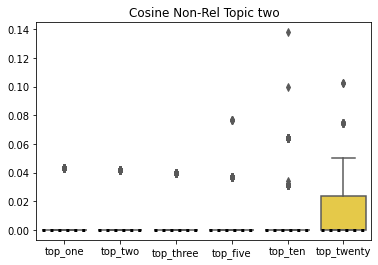

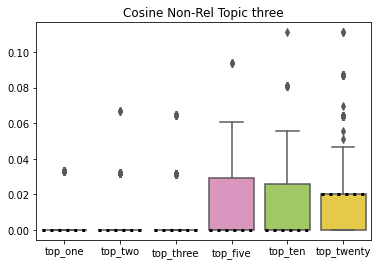

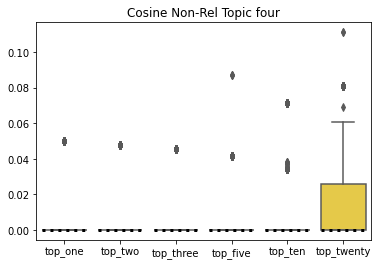

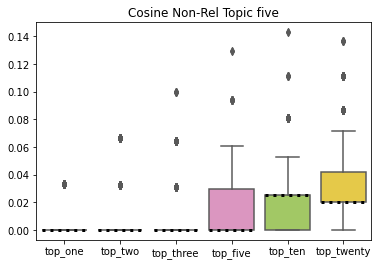

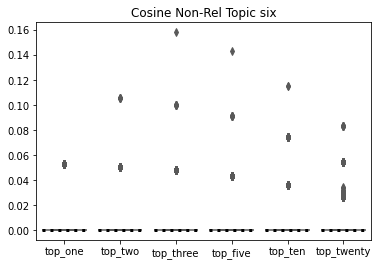

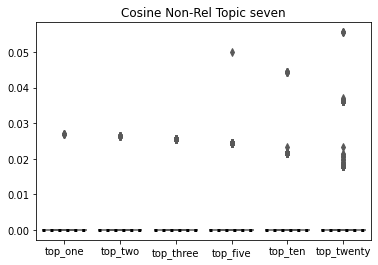

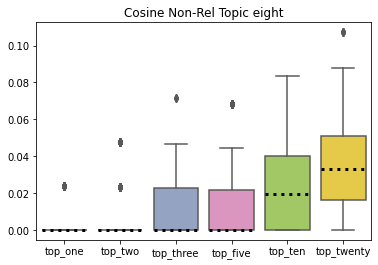

In [ ]:
import num2word
for i in range(1,9):
  df=pd.read_csv('/content/drive/MyDrive/IRDM/Cosine_non_relevant_nr{}.csv'.format(str(i)))
  fig, ax = plt.subplots()
  ax = sns.boxplot(data=df, orient="v", palette="Set2",medianprops={'color': 'black', 'ls': ':', 'lw': 3})  
  plt.title('Cosine Non-Rel Topic {}'.format(p.number_to_words(i)))
  plt.savefig('/content/drive/MyDrive/IRDM/cosine_non_relevant_topic_nr{}.png'.format(i))

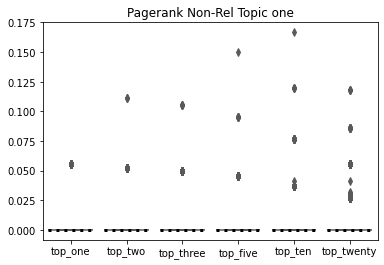

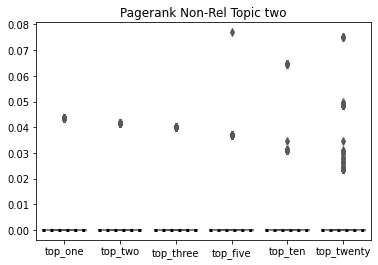

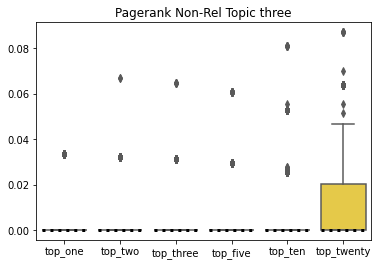

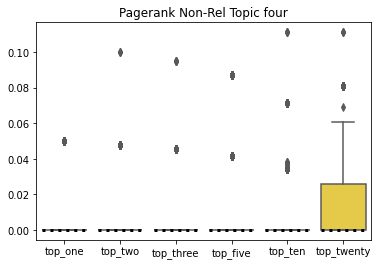

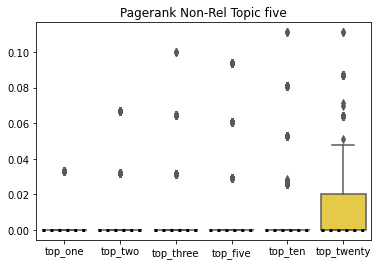

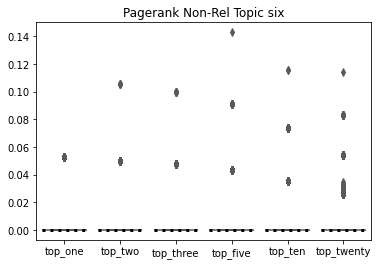

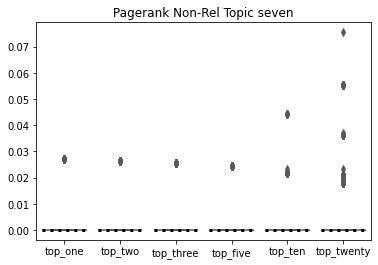

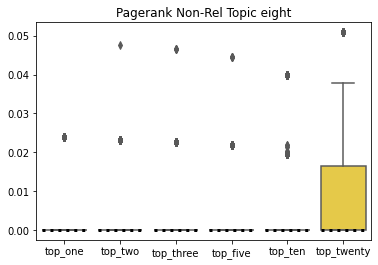

In [ ]:
import num2word
for i in range(1,9):
  df=pd.read_csv('/content/drive/MyDrive/IRDM/pagerank_non_relevant_nr{}.csv'.format(str(i)))
  fig, ax = plt.subplots()
  ax = sns.boxplot(data=df, orient="v", palette="Set2",medianprops={'color': 'black', 'ls': ':', 'lw': 3})  
  plt.title('Pagerank Non-Rel Topic {}'.format(p.number_to_words(i)))
  plt.savefig('/content/drive/MyDrive/IRDM/pagerank_non_relevant_topic_nr{}.png'.format(i))

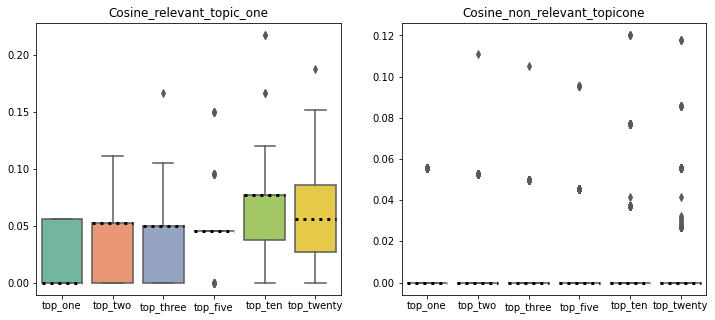

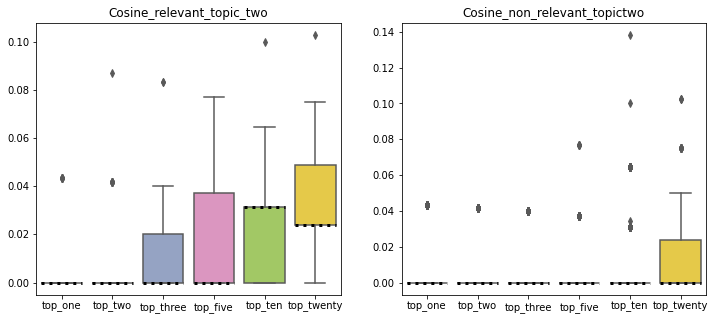

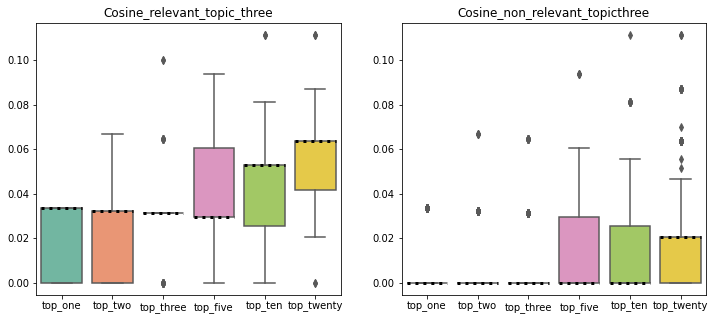

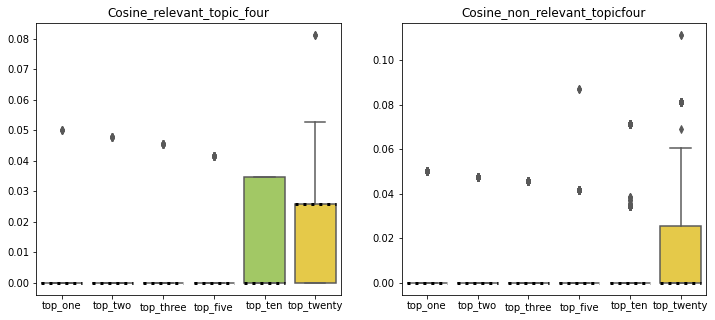

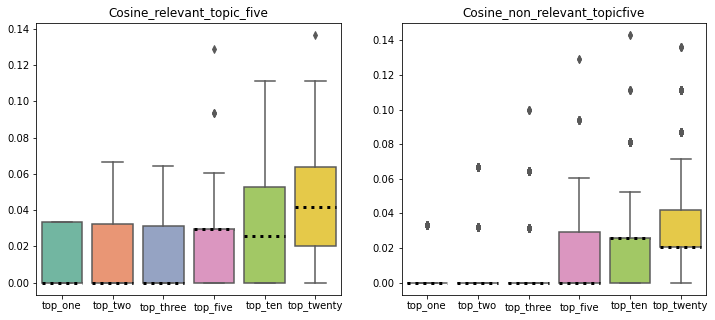

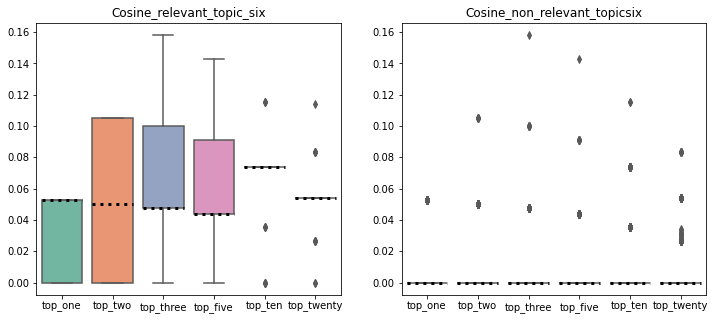

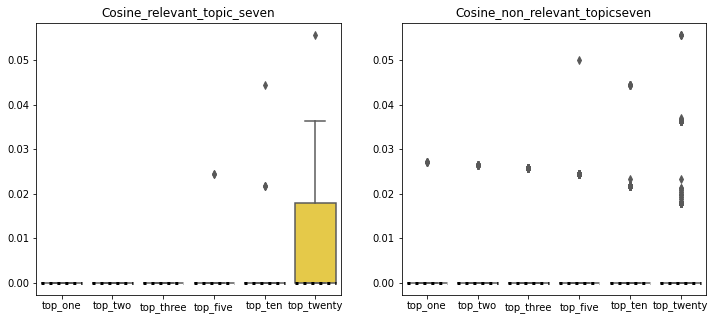

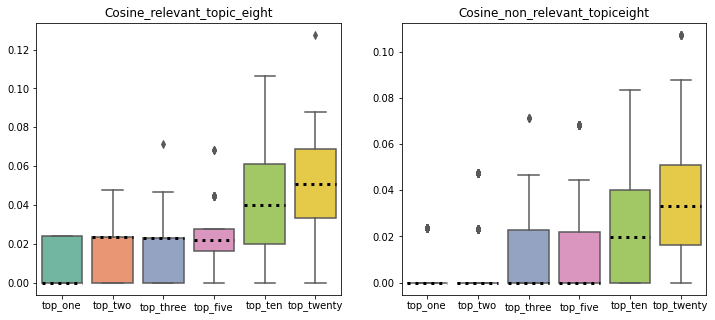

In [ ]:
import num2word
for i in range(1,9):
  df=pd.read_csv('/content/drive/MyDrive/IRDM/Cosine_relevant_{}.csv'.format(str(i)))
  df_2=pd.read_csv('/content/drive/MyDrive/IRDM/Cosine_non_relevant_nr{}.csv'.format(str(i)))
  
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))


  sns.boxplot(  data=df,  orient='v' , ax=axes[0],palette="Set2",medianprops={'color': 'black', 'ls': ':', 'lw': 3})
  sns.boxplot(   data=df_2,  orient='v' , ax=axes[1],palette="Set2",medianprops={'color': 'black', 'ls': ':', 'lw': 3})
  axes[0].title.set_text('Cosine_relevant_topic_{}'.format(p.number_to_words(i)))
  axes[1].title.set_text('Cosine_non_relevant_topic{}'.format(p.number_to_words(i)))
  plt.savefig('/content/drive/MyDrive/IRDM/cosine_rel_vs_non_rel_topic_{}.png'.format(i))

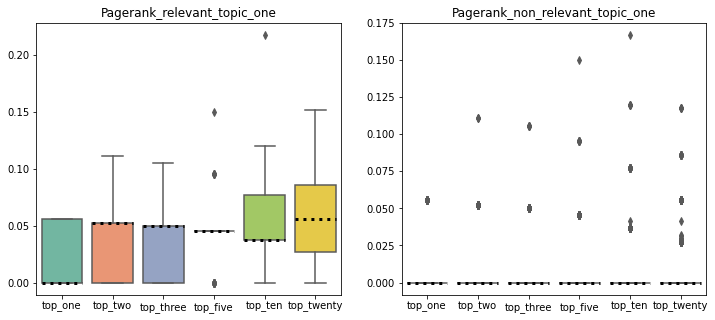

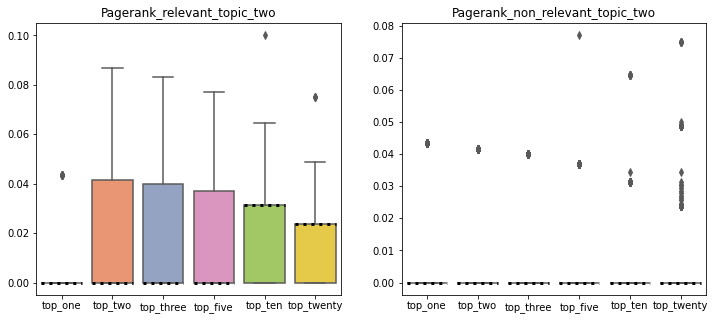

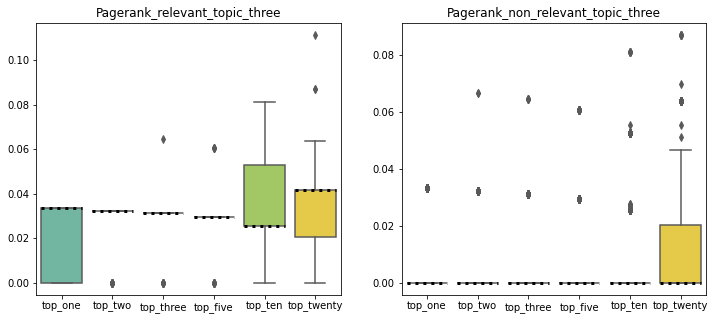

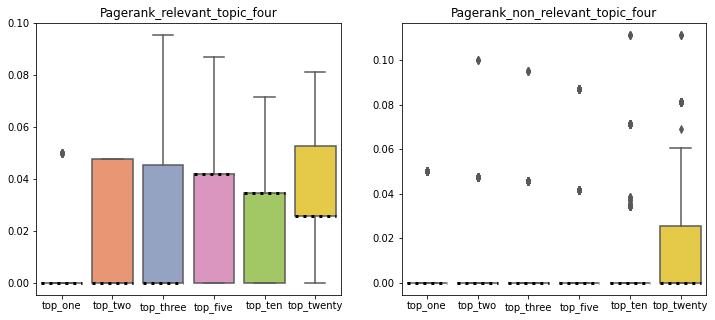

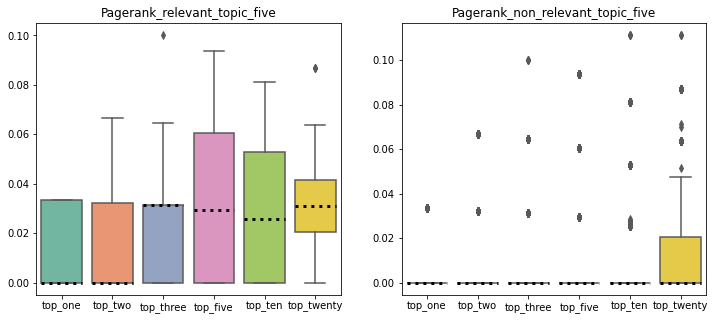

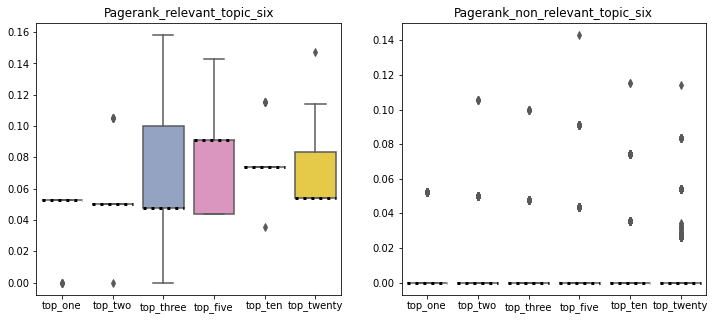

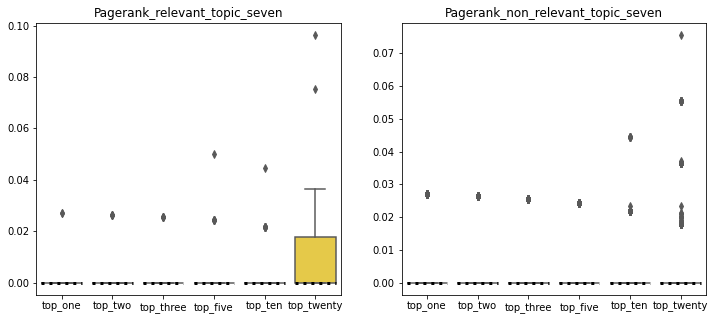

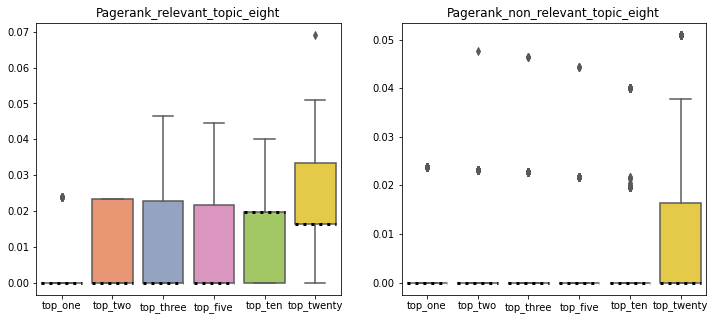

In [ ]:
import num2word
for i in range(1,9):
  df=pd.read_csv('/content/drive/MyDrive/IRDM/pagerank_relevant_{}.csv'.format(str(i)))
  df_2=pd.read_csv('/content/drive/MyDrive/IRDM/pagerank_non_relevant_nr{}.csv'.format(str(i)))
  
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))


  sns.boxplot(  data=df,  orient='v' , ax=axes[0],palette="Set2",medianprops={'color': 'black', 'ls': ':', 'lw': 3})
  sns.boxplot(   data=df_2,  orient='v' , ax=axes[1],palette="Set2",medianprops={'color': 'black', 'ls': ':', 'lw': 3})
  axes[0].title.set_text('Pagerank_relevant_topic_{}'.format(p.number_to_words(i)))
  axes[1].title.set_text('Pagerank_non_relevant_topic_{}'.format(p.number_to_words(i)))
  plt.savefig('/content/drive/MyDrive/IRDM/pagerank_rel_vs_non_rel_topic_{}.png'.format(i))

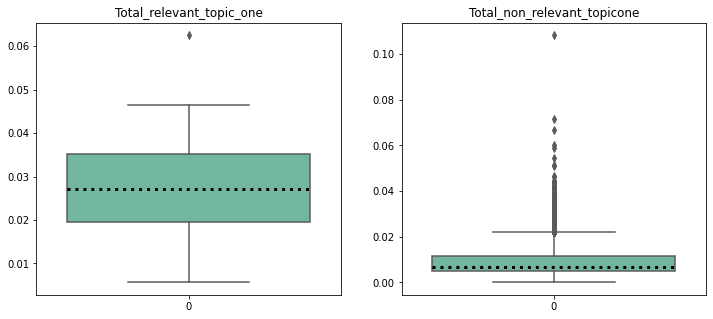

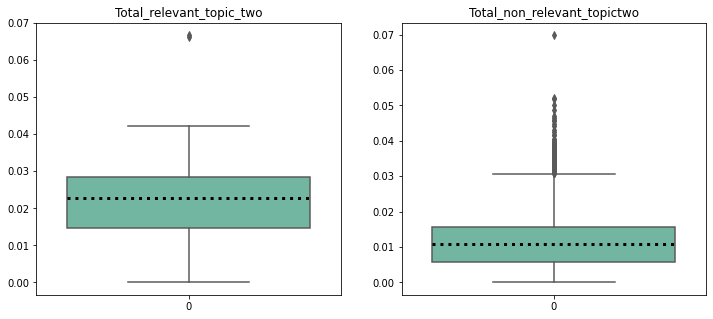

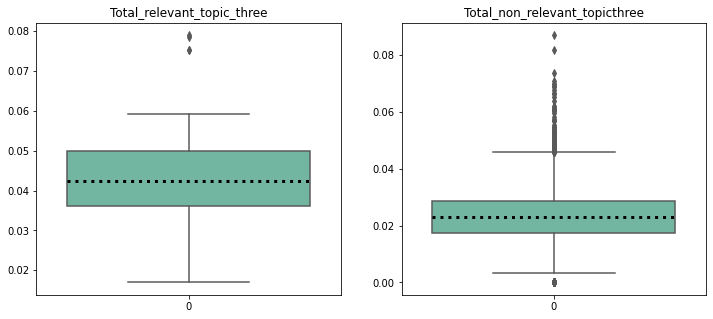

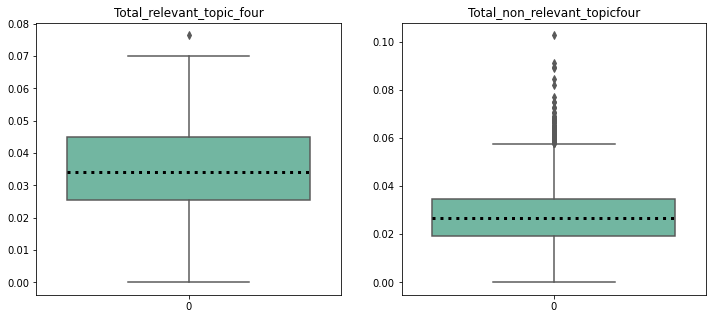

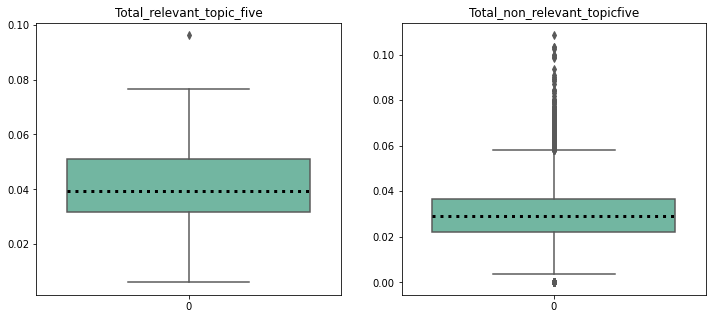

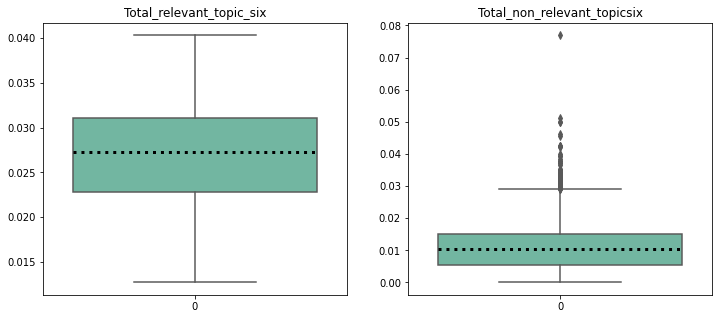

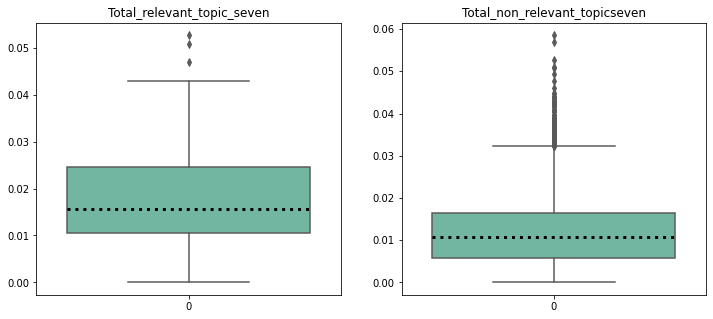

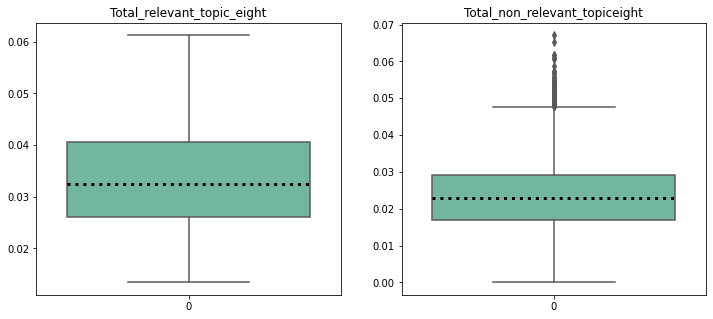

In [ ]:
import num2word
for i in range(1,9):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))


  sns.boxplot(  data=X_rel[str(i)],  orient='v' , ax=axes[0],palette="Set2",medianprops={'color': 'black', 'ls': ':', 'lw': 3})
  sns.boxplot(   data=X_non_rel[str(i)],  orient='v' , ax=axes[1],palette="Set2",medianprops={'color': 'black', 'ls': ':', 'lw': 3})
  axes[0].title.set_text('Total_relevant_topic_{}'.format(p.number_to_words(i)))
  axes[1].title.set_text('Total_non_relevant_topic{}'.format(p.number_to_words(i)))
  plt.savefig('/content/drive/MyDrive/IRDM/Overall_rel_vs_non_rel_topic_{}.png'.format(i))

In [ ]:
np.save('/content/drive/MyDrive/IRDM/jaccard_scores_description.npy', score_queries) 

In [ ]:
muster = {'Score':X_pr_one[str(t)],'top_two' :X_pr_two[str(t)],'top_three': X_pr_three[str(t)],'top_five': X_pr_five[str(t)], 'top_ten': X_pr_ten[str(t)], 'top_twenty': X_pr_twenty[str(t)]}
save_fil=pd.DataFrame.from_dict(muster)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
def create_plot_master(relevant_doc,non_relevant_doc):
  top_num=list(range(1,9))
  data_record=pd.DataFrame([])
  for t in top_num:
    muster = {'Jaccard_Similarity':relevant_doc[str(t)],'Topic' : [str(t)]*len(relevant_doc[str(t)]),'Relevant':['Yes']*len(relevant_doc[str(t)])}
    df=pd.DataFrame.from_dict(muster)
    data_record=pd.concat([data_record,df])
  for t in top_num:
    muster = {'Jaccard_Similarity':non_relevant_doc[str(t)],'Topic' : [str(t)]*len(non_relevant_doc[str(t)]),'Relevant':['No']*len(non_relevant_doc[str(t)])}
    df=pd.DataFrame.from_dict(muster)
    data_record=pd.concat([data_record,df])
  return data_record

In [ ]:
plot_data=create_plot_master(X_rel,X_non_rel)

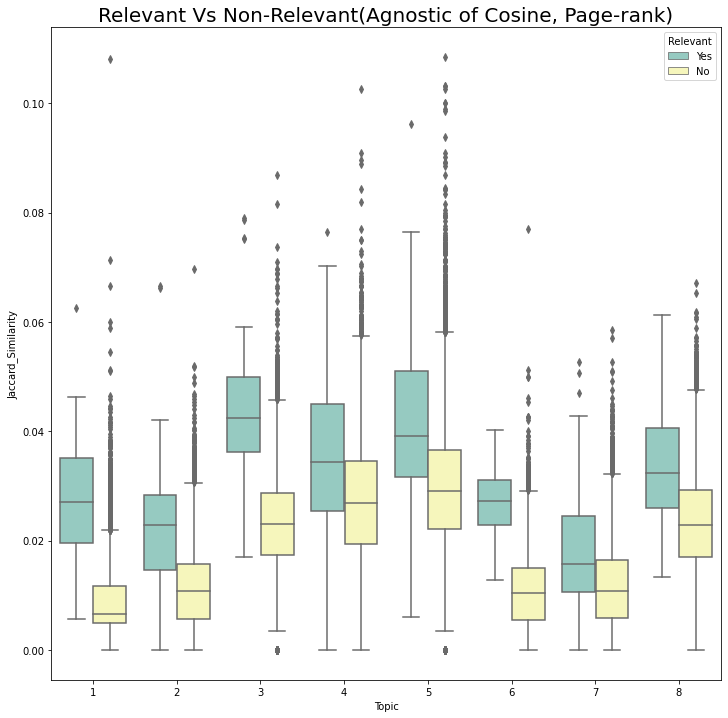

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
ax = sns.boxplot(x="Topic", y="Jaccard_Similarity", hue="Relevant",
                 data=plot_data, palette="Set3")
plt.title('Relevant Vs Non-Relevant(Agnostic of Cosine, Page-rank)',fontsize=20)
plt.savefig('/content/drive/MyDrive/IRDM/jaccard_scores_overall.png')

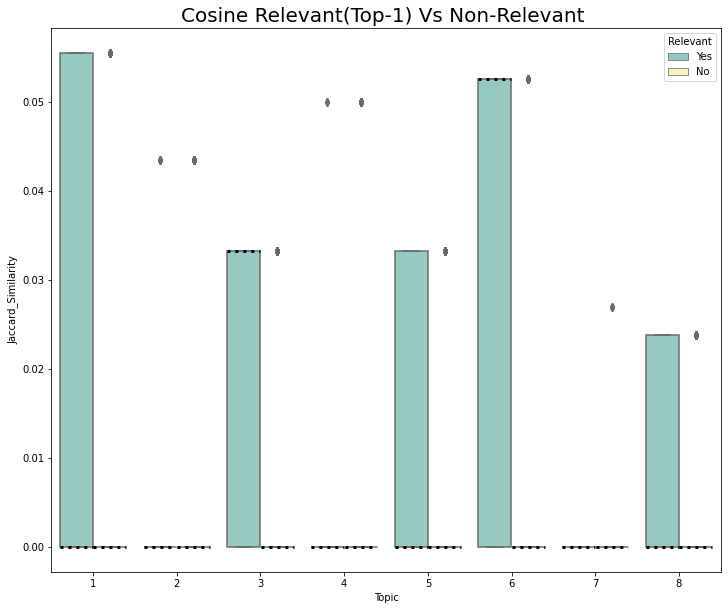

In [ ]:
cos_data_one_top=create_plot_master(X_cos_one,X_cos_nrel_one_nr)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
ax = sns.boxplot(x="Topic", y="Jaccard_Similarity", hue="Relevant",
                 data=cos_data_one_top, palette="Set3",medianprops={'color': 'black', 'ls': ':', 'lw': 3})
plt.title('Cosine Relevant(Top-1) Vs Non-Relevant ',fontsize=20)
plt.savefig('/content/drive/MyDrive/IRDM/Cosine_scores_top_1.png')

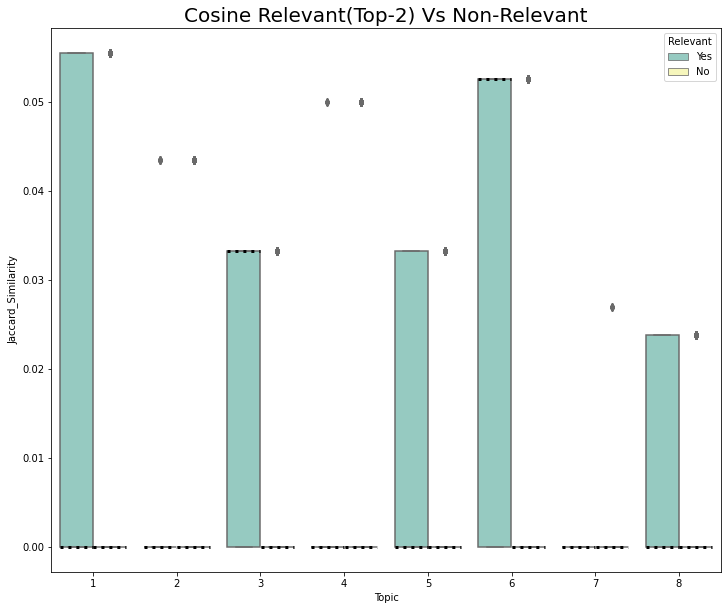

In [ ]:
cos_data_two_top=create_plot_master(X_cos_two,X_cos_nrel_two_nr)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
ax = sns.boxplot(x="Topic", y="Jaccard_Similarity", hue="Relevant",
                 data=cos_data_one_top, palette="Set3",medianprops={'color': 'black', 'ls': ':', 'lw': 3})
plt.title('Cosine Relevant(Top-2) Vs Non-Relevant',fontsize=20)
plt.savefig('/content/drive/MyDrive/IRDM/Cosine_scores_top_2.png')

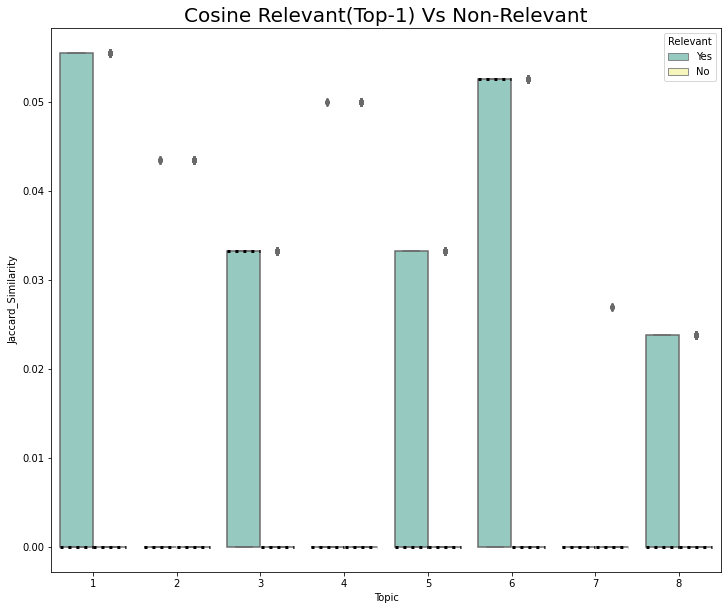

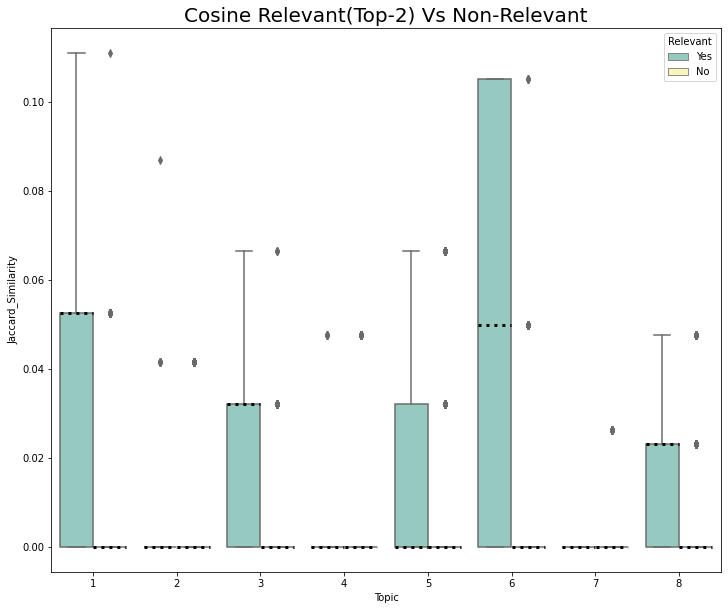

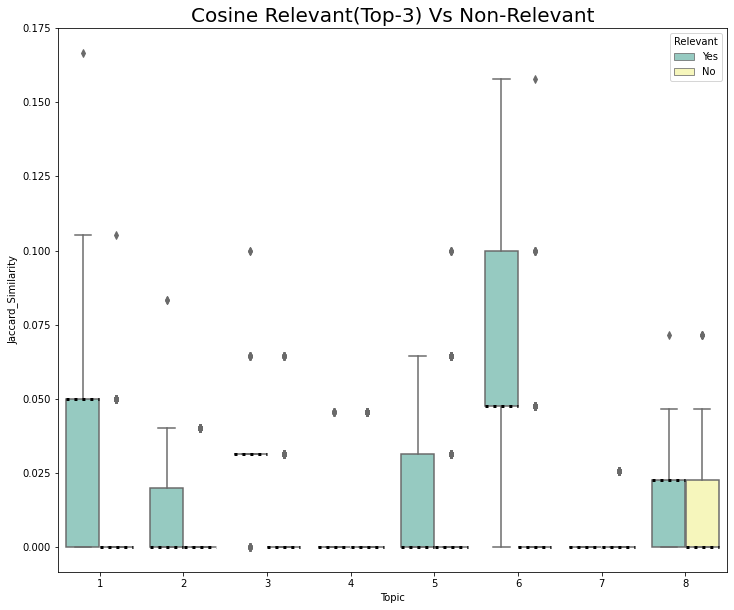

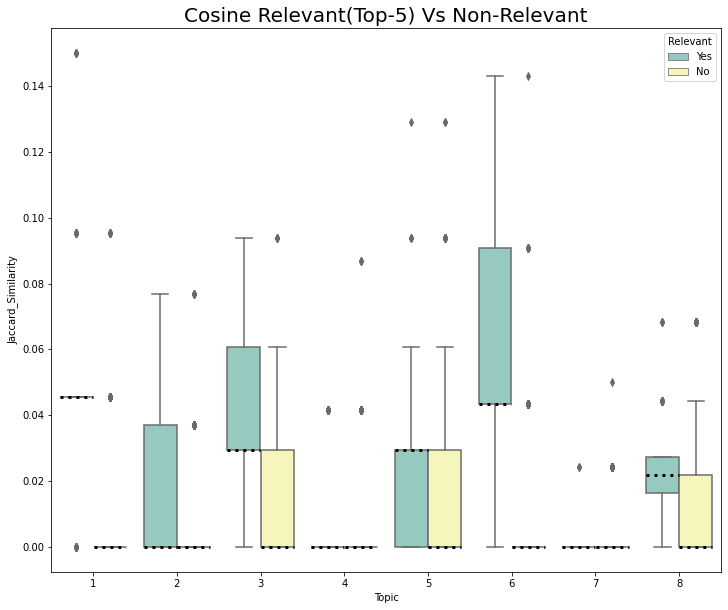

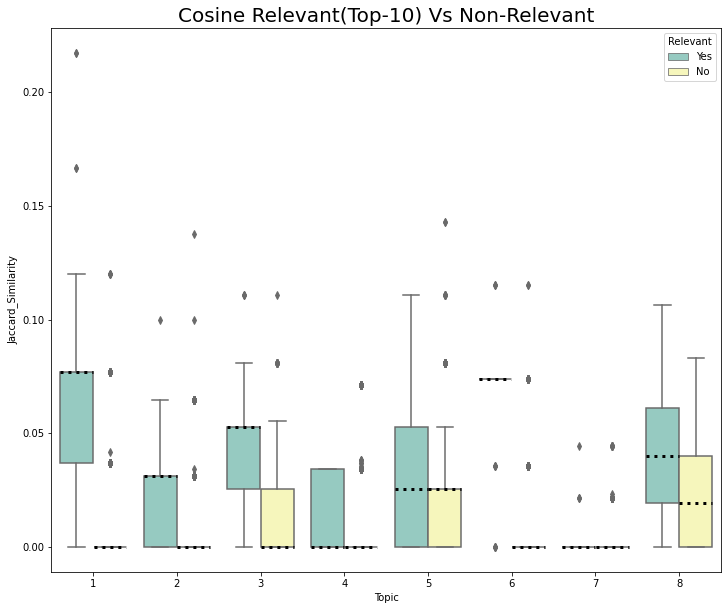

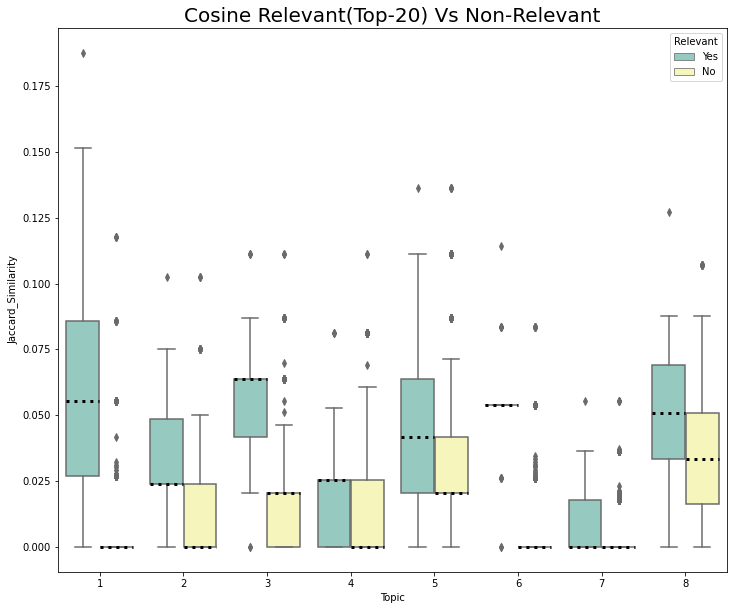

In [ ]:
def create_plot_cosine(rel,non_rel,top_n):
  create_data=create_plot_master(rel,non_rel)
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
  ax = sns.boxplot(x="Topic", y="Jaccard_Similarity", hue="Relevant",
                 data=create_data, palette="Set3",medianprops={'color': 'black', 'ls': ':', 'lw': 3})
  plt.title('Cosine Relevant(Top-{}) Vs Non-Relevant'.format(str(top_n)),fontsize=20)
  plt.savefig('/content/drive/MyDrive/IRDM/Cosine_scores_top_nr{}.png'.format(str(top_n)))

def plotter_cosine(list_of_list):
  for i in list_of_list:
    create_plot_cosine(i[0],i[1],i[2])
plotter_cosine([[X_cos_one,X_cos_nrel_one_nr,1],[X_cos_two,X_cos_nrel_two_nr,2],[X_cos_three,X_cos_nrel_three_nr,3],[X_cos_five,X_cos_nrel_five_nr,5],[X_cos_ten,X_cos_nrel_ten_nr,10],[X_cos_twenty,X_cos_nrel_twenty_nr,20]])

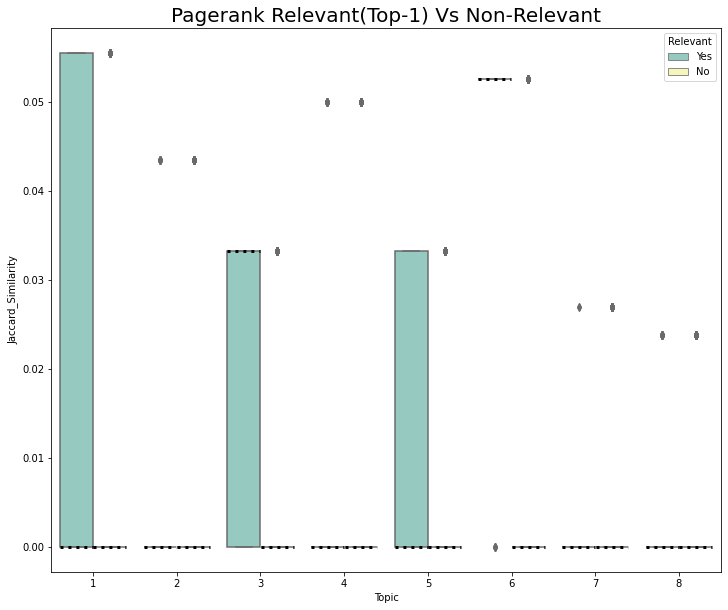

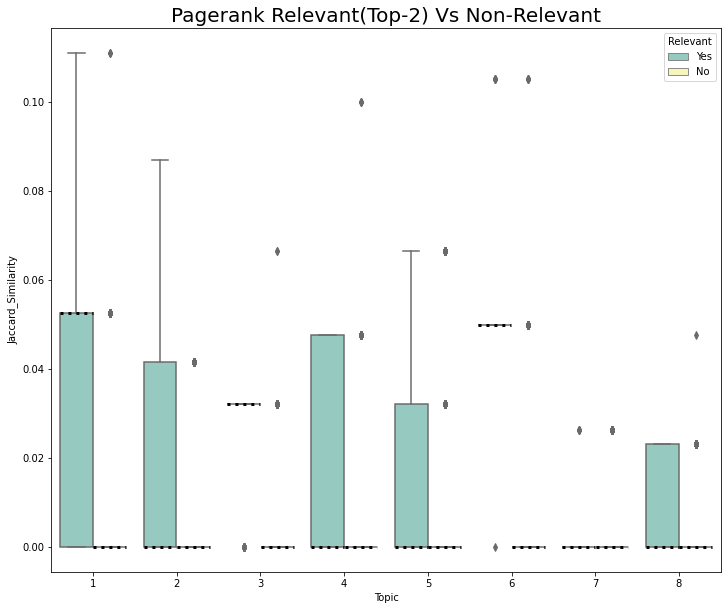

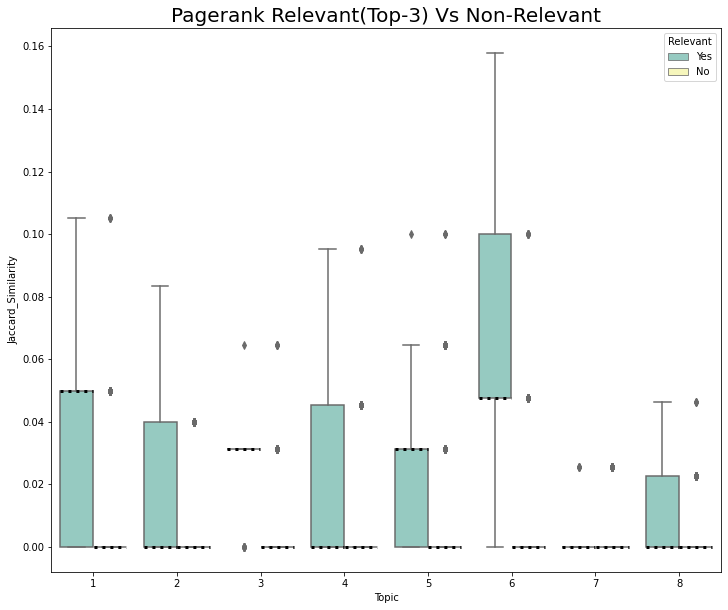

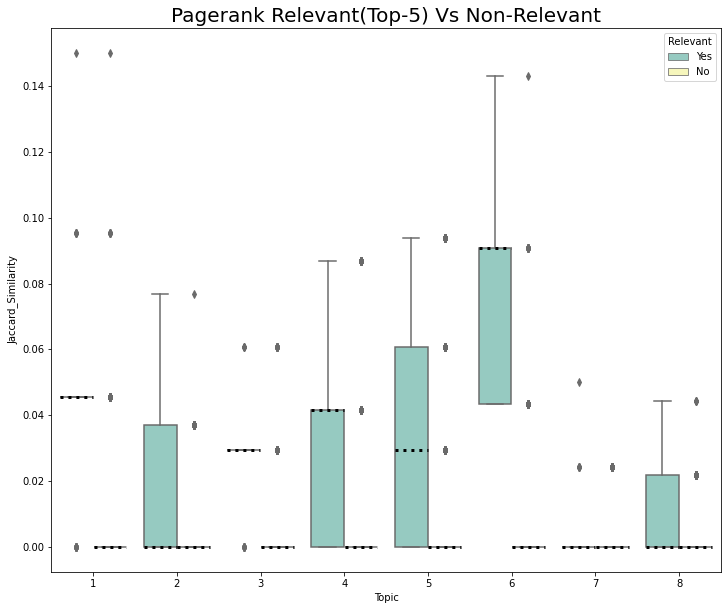

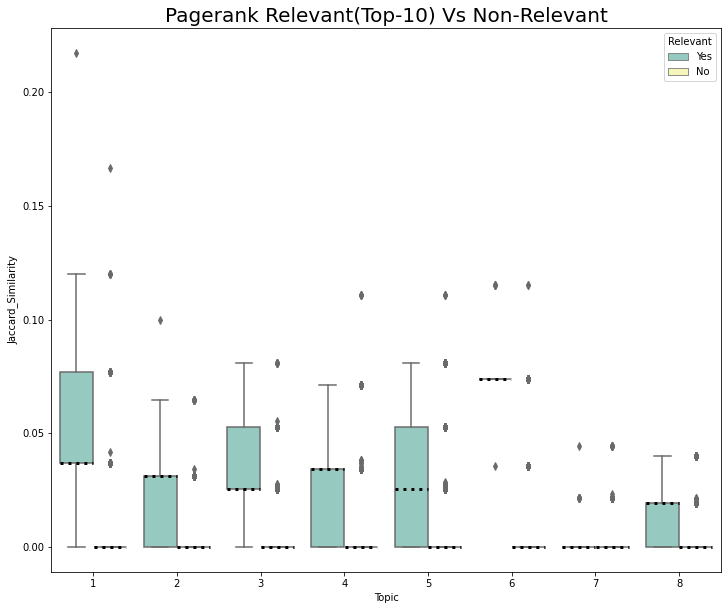

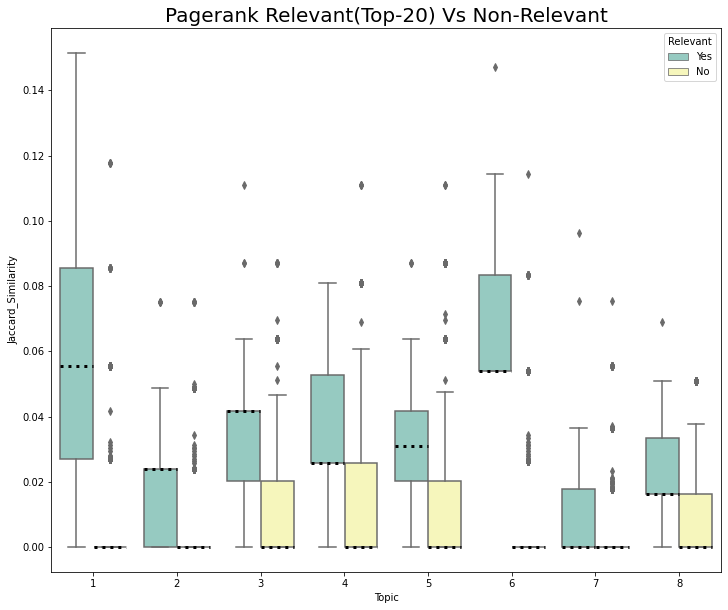

In [ ]:
def create_plot_pr(rel,non_rel,top_n):
  create_data=create_plot_master(rel,non_rel)
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
  ax = sns.boxplot(x="Topic", y="Jaccard_Similarity", hue="Relevant",
                 data=create_data, palette="Set3",medianprops={'color': 'black', 'ls': ':', 'lw': 3})
  plt.title('Pagerank Relevant(Top-{}) Vs Non-Relevant'.format(str(top_n)),fontsize=20)
  plt.savefig('/content/drive/MyDrive/IRDM/Pagerank_scores_top_nr{}.png'.format(str(top_n)))

def plotter_pr(list_of_list):
  for i in list_of_list:
    create_plot_pr(i[0],i[1],i[2])
plotter_pr([[X_pr_one,X_pr_nrel_one_nr,1],[X_pr_two,X_pr_nrel_two_nr,2],[X_pr_three,X_pr_nrel_three_nr,3],[X_pr_five,X_pr_nrel_five_nr,5],[X_pr_ten,X_pr_nrel_ten_nr,10],[X_pr_twenty,X_pr_nrel_twenty_nr,20]])

Man- Whitney Score Example with total stats

In [ ]:

data_table=pd.DataFrame([])
for topics in list(range(1,9)):
  gather_data = {'Topic': str(topics) ,'Relevant_docs' : len(X_rel[str(topics)]),'Non_Relevant':len(X_non_rel[str(topics)]), 'Mean_Whitney_Score_Statistic' : list(scipy.stats.mannwhitneyu(X_non_rel[str(topics)],X_rel[str(t)],alternative='less'))[0], 'Mean_Whitney_Score_pvalue': list(scipy.stats.mannwhitneyu(X_non_rel[str(topics)],X_rel[str(t)],alternative='less'))[1]}
  holder=pd.DataFrame(gather_data,index=[topics])
  data_table=pd.concat([data_table,holder])

In [ ]:
data_table

,Topic,Relevant_docs,Non_Relevant,Mean_Whitney_Score_Statistic,Mean_Whitney_Score_pvalue
1,1,70,14109,64763.0,1.244878e-36
2,2,63,14116,107283.0,5.223174e-30
3,3,78,14101,380534.0,4.670298e-04
4,4,78,14101,488240.0,4.383829e-01
5,5,80,14099,545731.0,9.371208e-01
6,6,37,14142,91230.0,2.047325e-32
7,7,77,14102,117511.0,1.594875e-28
8,8,80,14099,383026.5,6.080569e-04


In [ ]:

def save_table(non_rel,rel,file_loc_name):
  empty_table=pd.DataFrame([])
  for topics in list(range(1,9)):
    gather = {'Topic': str(topics) ,'Relevant_docs' : len(rel[str(topics)]),'Non_Relevant_docs':len(non_rel[str(topics)]), 'Median_relevant': np.median(rel[str(topics)]), 'Median_non_relevant': np.median(non_rel[str(topics)])  ,'Mann_Whitney_Score_Statistic' : list(scipy.stats.mannwhitneyu(non_rel[str(topics)],rel[str(t)],alternative='less'))[0], 'Mann_Whitney_Score_pvalue': list(scipy.stats.mannwhitneyu(non_rel[str(topics)],rel[str(t)],alternative='less'))[1]}
    hold=pd.DataFrame(gather,index=[topics-1])
    empty_table=pd.concat([empty_table,hold])
  empty_table.to_csv(file_loc_name)

In [ ]:
save_table(X_non_rel,X_rel,'/content/drive/MyDrive/IRDM/Overall_Table_with_statistics.csv')

In [ ]:
save_table(X_cos_nrel_one_nr,X_cos_one,'/content/drive/MyDrive/IRDM/Cos_Table_with_statistics_one.csv')
save_table(X_cos_nrel_two_nr,X_cos_two,'/content/drive/MyDrive/IRDM/Cos_Table_with_statistics_two.csv')
save_table(X_cos_nrel_three_nr,X_cos_three,'/content/drive/MyDrive/IRDM/Cos_Table_with_statistics_three.csv')
save_table(X_cos_nrel_five_nr,X_cos_five,'/content/drive/MyDrive/IRDM/Cos_Table_with_statistics_five.csv')
save_table(X_cos_nrel_ten_nr,X_cos_ten,'/content/drive/MyDrive/IRDM/Cos_Table_with_statistics_ten.csv')
save_table(X_cos_nrel_twenty_nr,X_cos_twenty,'/content/drive/MyDrive/IRDM/Cos_Table_with_statistics_twenty.csv')

In [ ]:
save_table(X_pr_nrel_one_nr,X_pr_one,'/content/drive/MyDrive/IRDM/pr_Table_with_statistics_one.csv')
save_table(X_pr_nrel_two_nr,X_pr_two,'/content/drive/MyDrive/IRDM/pr_Table_with_statistics_two.csv')
save_table(X_pr_nrel_three_nr,X_pr_three,'/content/drive/MyDrive/IRDM/pr_Table_with_statistics_three.csv')
save_table(X_pr_nrel_five_nr,X_pr_five,'/content/drive/MyDrive/IRDM/pr_Table_with_statistics_five.csv')
save_table(X_pr_nrel_ten_nr,X_pr_ten,'/content/drive/MyDrive/IRDM/pr_Table_with_statistics_ten.csv')
save_table(X_pr_nrel_twenty_nr,X_pr_twenty,'/content/drive/MyDrive/IRDM/pr_Table_with_statistics_twenty.csv')

Misc Code 

In [ ]:
np.save('/content/drive/MyDrive/IRDM/relevant_data.npy',just_relevant) 


In [ ]:
np.save('/content/drive/MyDrive/IRDM/relevant_data_queries.npy',relevant_only_queries) 

In [ ]:
X={}
for keys in just_relevant.keys():
  for i in range(len(just_relevant[keys])):
    if keys not in X.keys():
      X.update({keys:[just_relevant[keys][i][1]]})
    else:
      X[keys].append(just_relevant[keys][i][1])

In [ ]:
np.save('/content/drive/MyDrive/IRDM/relevant_data_X_scores_description.npy',X) 

In [ ]:
X_q={}
for keys in relevant_only_queries.keys():
  for i in range(len(relevant_only_queries[keys])):
    if keys not in X_q.keys():
      X_q.update({keys:[relevant_only_queries[keys][i][1]]})
    else:
      X_q[keys].append(relevant_only_queries[keys][i][1])

In [ ]:
np.save('/content/drive/MyDrive/IRDM/relevant_data_X_scores_queries.npy',X_q) 

(array([ 9., 19.,  0., 27., 12.,  0.,  8.,  0.,  4.,  1.]),
 array([0.        , 0.01363636, 0.02727273, 0.04090909, 0.05454545,
        0.06818182, 0.08181818, 0.09545455, 0.10909091, 0.12272727,
        0.13636364]),
 <a list of 10 Patch objects>)

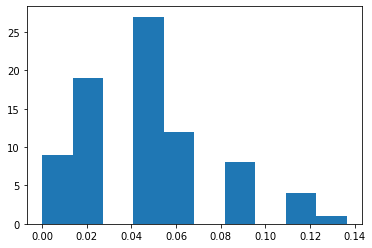

In [ ]:
import matplotlib.pyplot as plt
plt.hist(np.array(X_cos_twenty['5']))


In [ ]:
X_non={}
for keys in non_relevant.keys():
  for i in range(len(non_relevant[keys])):
    if keys not in X_non.keys():
      X_non.update({keys:[non_relevant[keys][i][1]]})
    else:
      X_non[keys].append(non_relevant[keys][i][1])

(array([9.771e+03, 3.743e+03, 5.250e+02, 5.600e+01, 8.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.01081081, 0.02162162, 0.03243243, 0.04324324,
        0.05405405, 0.06486486, 0.07567568, 0.08648649, 0.0972973 ,
        0.10810811]),
 <a list of 10 Patch objects>)

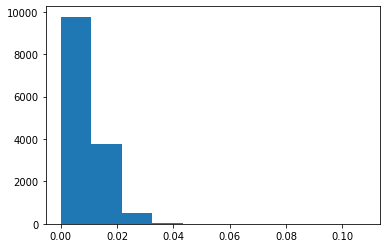

In [ ]:
import matplotlib.pyplot as plt
plt.hist(np.array(X_non['1']))

Text(0.5, 1.0, 'Topic 1 : Relevant Queries Only-WikiQ')

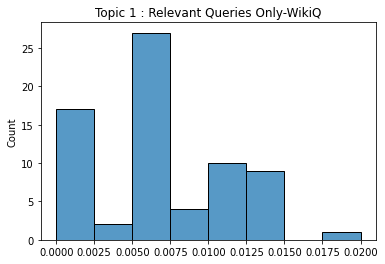

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X_q['1']))
plt.title('Topic 1 : Relevant Queries Only-WikiQ')

Text(0.5, 1.0, 'Topic 2 : Relevant Queries Only-WikiQ')

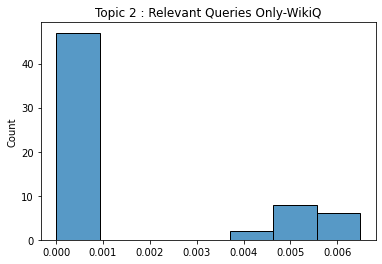

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X_q['2']))
plt.title('Topic 2 : Relevant Queries Only-WikiQ')

Text(0.5, 1.0, 'Topic 3 : Relevant Queries Only-WikiQ')

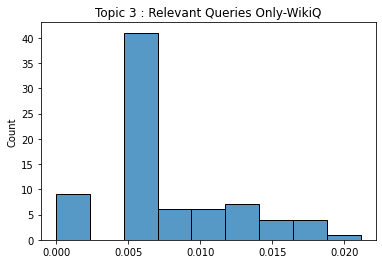

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X_q['3']))
plt.title('Topic 3 : Relevant Queries Only-WikiQ')

Text(0.5, 1.0, 'Topic 4 : Relevant Queries Only-WikiQ')

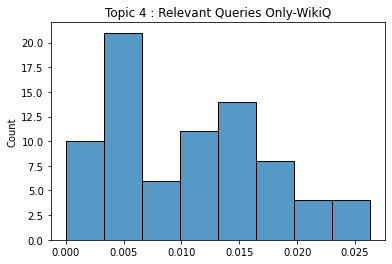

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X_q['4']))
plt.title('Topic 4 : Relevant Queries Only-WikiQ')

Text(0.5, 1.0, 'Topic 5 : Relevant Queries Only-WikiQ')

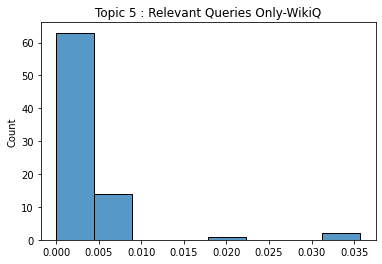

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X_q['5']))
plt.title('Topic 5 : Relevant Queries Only-WikiQ')

Text(0.5, 1.0, 'Topic 6 : Relevant Queries Only-WikiQ')

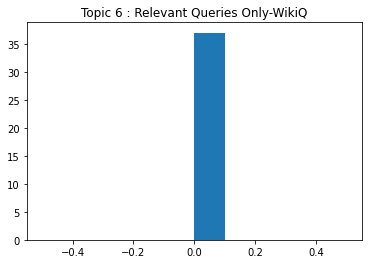

In [ ]:
import seaborn as sns 
plt.hist(np.array(X_q['6']))
plt.title('Topic 6 : Relevant Queries Only-WikiQ')

Text(0.5, 1.0, 'Topic 7 : Relevant Queries Only-WikiQ')

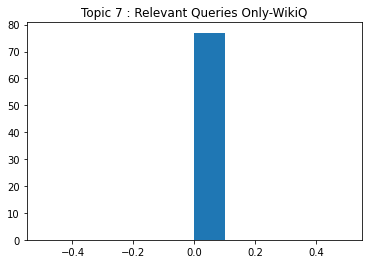

In [ ]:
import seaborn as sns 
plt.hist(np.array(X_q['7']))
plt.title('Topic 7 : Relevant Queries Only-WikiQ')

Text(0.5, 1.0, 'Topic 5 : Relevant Queries Only-WikiQ')

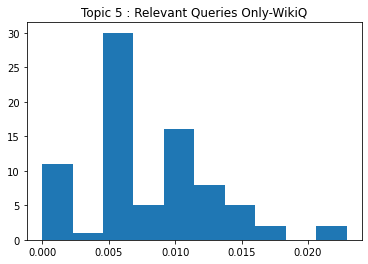

In [ ]:
import seaborn as sns 
plt.hist(np.array(X_q['8']))
plt.title('Topic 5 : Relevant Queries Only-WikiQ')

#Descriptions and Queries Wiki

Text(0.5, 1.0, 'Topic 1 : Relevant Queries Only-WikiQ+D')

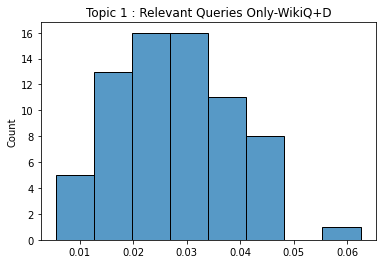

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X['1']))
plt.title('Topic 1 : Relevant Queries Only-WikiQ+D')

Text(0.5, 1.0, 'Topic 2 : Relevant Queries Only-WikiQ+D')

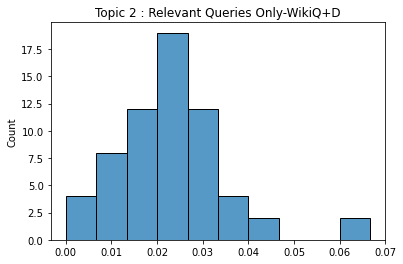

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X['2']))
plt.title('Topic 2 : Relevant Queries Only-WikiQ+D')

Text(0.5, 1.0, 'Topic 3 : Relevant Queries Only-WikiQ+D')

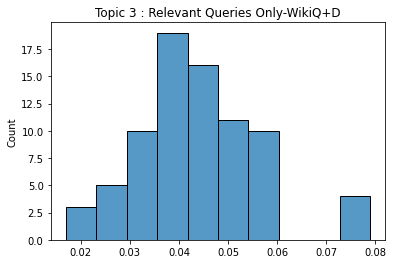

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X['3']))
plt.title('Topic 3 : Relevant Queries Only-WikiQ+D')

Text(0.5, 1.0, 'Topic 4 : Relevant Queries Only-WikiQ+D')

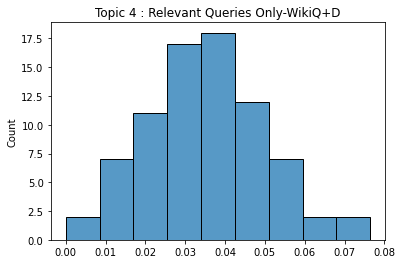

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X['4']))
plt.title('Topic 4 : Relevant Queries Only-WikiQ+D')

Text(0.5, 1.0, 'Topic 5 : Relevant Queries Only-WikiQ+D')

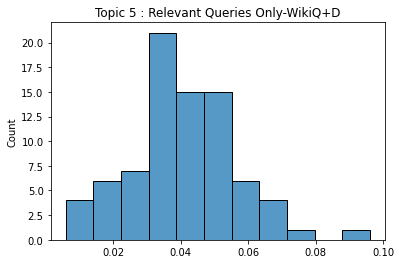

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X['5']))
plt.title('Topic 5 : Relevant Queries Only-WikiQ+D')

Text(0.5, 1.0, 'Topic 6 : Relevant Queries Only-WikiQ+D')

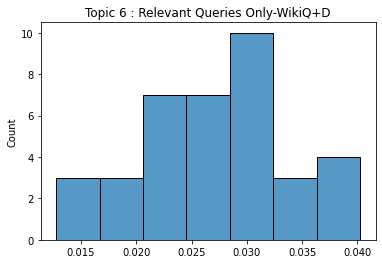

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X['6']))
plt.title('Topic 6 : Relevant Queries Only-WikiQ+D')

Text(0.5, 1.0, 'Topic 7 : Relevant Queries Only-WikiQ+D')

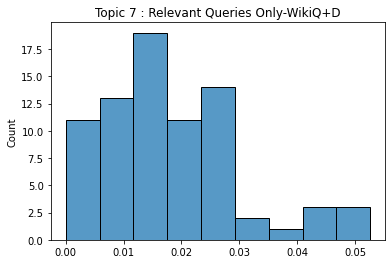

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X['7']))
plt.title('Topic 7 : Relevant Queries Only-WikiQ+D')

Text(0.5, 1.0, 'Topic 8 : Relevant Queries Only-WikiQ+D')

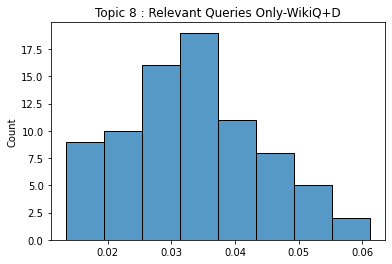

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X['8']))
plt.title('Topic 8 : Relevant Queries Only-WikiQ+D')

#Non relevant 

Text(0.5, 1.0, 'Topic 1 : Non Relevant Queries Only')

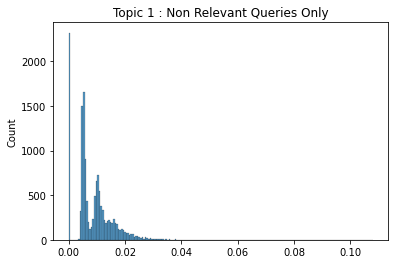

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X_non['1']))
plt.title('Topic 1 : Non Relevant Queries Only')

Text(0.5, 1.0, 'Topic 2 : Non Relevant Queries Only')

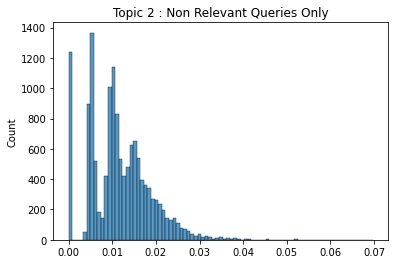

In [ ]:
import seaborn as sns 
sns.histplot(np.array(X_non['2']))
plt.title('Topic 2 : Non Relevant Queries Only')

Text(0.5, 1.0, 'Topic 1 : Non Relevant Queries Only')

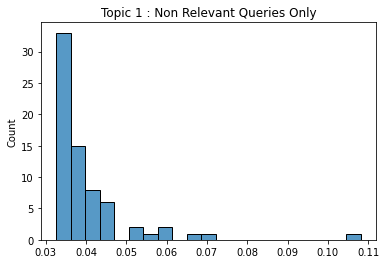

In [ ]:
import seaborn as sns 
sns.histplot(np.array(sorted(X_non['1'],reverse=True)[:70]))
plt.title('Topic 1 : Non Relevant Queries Only')

Text(0.5, 1.0, 'Topic 2 : Non Relevant Queries Only')

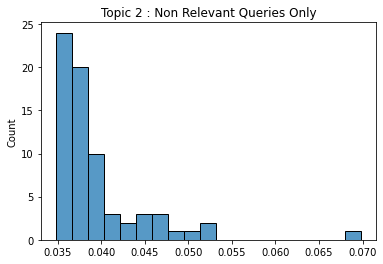

In [ ]:
import seaborn as sns 
sns.histplot(np.array(sorted(X_non['2'],reverse=True)[:70]))
plt.title('Topic 2 : Non Relevant Queries Only')

Text(0.5, 1.0, 'Topic 3 : Non Relevant Queries Only')

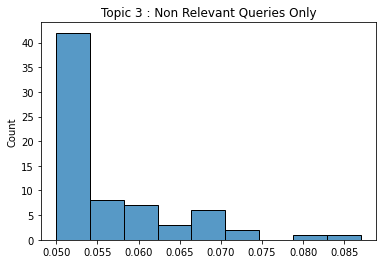

In [ ]:
import seaborn as sns 
sns.histplot(np.array(sorted(X_non['3'],reverse=True)[:70]))
plt.title('Topic 3 : Non Relevant Queries Only')

Text(0.5, 1.0, 'Topic 4 : Non Relevant Queries Only')

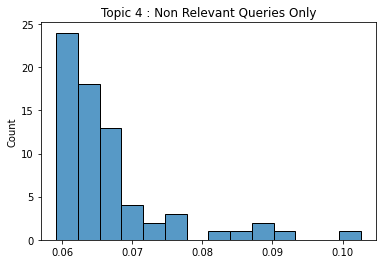

In [ ]:
import seaborn as sns 
sns.histplot(np.array(sorted(X_non['4'],reverse=True)[:70]))
plt.title('Topic 4 : Non Relevant Queries Only')

Text(0.5, 1.0, 'Topic 5 : Non Relevant Queries Only')

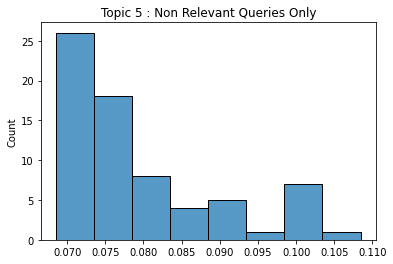

In [ ]:
import seaborn as sns 
sns.histplot(np.array(sorted(X_non['5'],reverse=True)[:70]))
plt.title('Topic 5 : Non Relevant Queries Only')

Text(0.5, 1.0, 'Topic 6 : Non Relevant Queries Only')

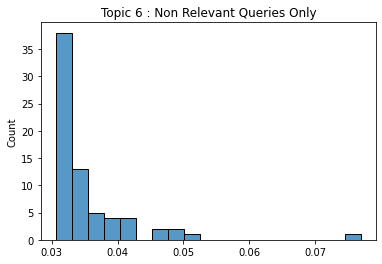

In [ ]:
import seaborn as sns 
sns.histplot(np.array(sorted(X_non['6'],reverse=True)[:70]))
plt.title('Topic 6 : Non Relevant Queries Only')

Text(0.5, 1.0, 'Topic 7 : Non Relevant Queries Only')

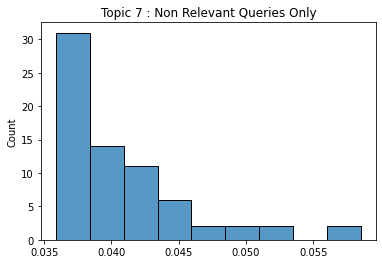

In [ ]:
import seaborn as sns 
sns.histplot(np.array(sorted(X_non['7'],reverse=True)[:70]))
plt.title('Topic 7 : Non Relevant Queries Only')

Text(0.5, 1.0, 'Topic 8 : Non Relevant Queries Only')

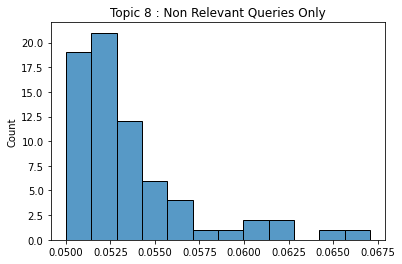

In [ ]:
import seaborn as sns 
sns.histplot(np.array(sorted(X_non['8'],reverse=True)[:70]))
plt.title('Topic 8 : Non Relevant Queries Only')

#MeanWhitney Test to Check Populations

In [ ]:
topics=['1','2','4','5','6','7','8']

for t in topics:
  print(scipy.stats.mannwhitneyu(X_non[t],X[t],alternative='less'))

MannwhitneyuResult(statistic=64763.0, pvalue=1.2448778051874697e-36)
MannwhitneyuResult(statistic=168540.0, pvalue=7.94913974412354e-18)
MannwhitneyuResult(statistic=369944.5, pvalue=2.976061934716226e-07)
MannwhitneyuResult(statistic=322335.5, pvalue=1.8151111573182735e-11)
MannwhitneyuResult(statistic=22851.0, pvalue=3.743869272530799e-22)
MannwhitneyuResult(statistic=357279.5, pvalue=1.0859529170497227e-07)
MannwhitneyuResult(statistic=271960.5, pvalue=6.307310832501973e-16)
